# Exploring the PAMAP2 Physical Activity Monitoring Dataset

We know from dataset describtion that it is divided into 2 sub-folders: Protocol and Optional.

## Protocol

In [1]:
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt
import numpy as np

from pandas.api.types import is_numeric_dtype
%matplotlib inline

In [2]:
path = r'C:\Users\meesh\Desktop\PAMAP2 Physical Activity Monitoring Data Set\PAMAP2_Dataset\Protocol' 
all_files = glob.glob(os.path.join(path, "*.dat"))

df_from_each_file = (pd.read_csv(f,header=None, delimiter=r"\s+").assign(subject = os.path.splitext(os.path.basename(f))[0]) for f in all_files)
protocol_df   = pd.concat(df_from_each_file, ignore_index=True)

The first thing we will check is the size of our dataset. Shape tells us about the rows and columns of dataframe

In [3]:
protocol_df.shape

(2872533, 55)

In [4]:
hand_lst = []
chest_lst = []
ankle_lst = []
for i in range(17):
    hand_lst.append('hand_'+str(i+1))
for i in range(17):
    chest_lst.append('chest_'+str(i+1))
for i in range(17):
    ankle_lst.append('ankle_'+str(i+1))
      
df_columns = ['timestamp','activityID','heartrate'] + hand_lst + chest_lst + ankle_lst + ['subject']

In [5]:
protocol_df.columns = df_columns

In [6]:
protocol_df.head()

,timestamp,activityID,heartrate,hand_1,hand_2,hand_3,hand_4,hand_5,hand_6,hand_7,...,ankle_9,ankle_10,ankle_11,ankle_12,ankle_13,ankle_14,ankle_15,ankle_16,ankle_17,subject
0,8.38,0,104.0,30.0,2.37223,8.60074,3.51048,2.43954,8.76165,3.35465,...,0.009250,-0.017580,-61.1888,-38.9599,-58.1438,1.0,0.0,0.0,0.0,subject101
1,8.39,0,NaN,30.0,2.18837,8.56560,3.66179,2.39494,8.55081,3.64207,...,-0.004638,0.000368,-59.8479,-38.8919,-58.5253,1.0,0.0,0.0,0.0,subject101
2,8.40,0,NaN,30.0,2.37357,8.60107,3.54898,2.30514,8.53644,3.73280,...,0.000148,0.022495,-60.7361,-39.4138,-58.3999,1.0,0.0,0.0,0.0,subject101
3,8.41,0,NaN,30.0,2.07473,8.52853,3.66021,2.33528,8.53622,3.73277,...,-0.020301,0.011275,-60.4091,-38.7635,-58.3956,1.0,0.0,0.0,0.0,subject101
4,8.42,0,NaN,30.0,2.22936,8.83122,3.70000,2.23055,8.59741,3.76295,...,-0.014303,-0.002823,-61.5199,-39.3879,-58.2694,1.0,0.0,0.0,0.0,subject101


In [7]:
protocol_df['activityID'].value_counts()

0     929661
4     238761
17    238690
1     192523
3     189931
7     188107
2     185188
16    175353
6     164600
12    117216
13    104944
5      98199
24     49360
Name: activityID, dtype: int64

We know from the describtion that activityID = 0 is transient and should be discarded. We have 929661 values that should be discarded

In [8]:
protocol_df = protocol_df[protocol_df.activityID != 0]

In [9]:
len(protocol_df)

1942872

To know how many data we have per test subject we can use groupby()

In [10]:
gp_by_subject = protocol_df.groupby(['subject'])
gp_by_subject['subject'].count()

subject
subject101    249957
subject102    263349
subject103    174338
subject104    231421
subject105    272442
subject106    250096
subject107    232776
subject108    262102
subject109      6391
Name: subject, dtype: int64

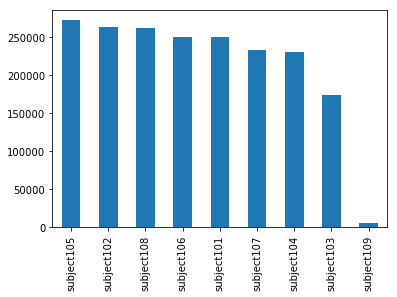

In [11]:
subjects_p = protocol_df['subject'].value_counts()
subjects_p.plot(kind="bar")

## Optional

In [12]:
path2 = r'C:\Users\meesh\Desktop\PAMAP2 Physical Activity Monitoring Data Set\PAMAP2_Dataset\Optional' 
all_files2 = glob.glob(os.path.join(path2, "*.dat"))

df_from_each_file2 = (pd.read_csv(f,header=None, delimiter=r"\s+").assign(subject = os.path.splitext(os.path.basename(f))[0]) for f in all_files2)
optional_df   = pd.concat(df_from_each_file2, ignore_index=True)

We can see that some of the data is missing. Many columns contain values less than 977972. 

In [13]:
optional_df.shape

(977972, 55)

In [14]:
optional_df.columns = df_columns

In [15]:
optional_df.head()

,timestamp,activityID,heartrate,hand_1,hand_2,hand_3,hand_4,hand_5,hand_6,hand_7,...,ankle_9,ankle_10,ankle_11,ankle_12,ankle_13,ankle_14,ankle_15,ankle_16,ankle_17,subject
0,10.03,0,105.0,33.3125,1.99964,6.94837,5.08845,2.62244,7.73457,4.64028,...,0.009471,0.003633,-43.8463,-2.97306,45.0822,1.0,0.0,0.0,0.0,subject101
1,10.04,0,NaN,33.3125,1.80990,6.45729,5.16424,2.19725,6.93762,5.06528,...,0.070031,0.001804,-43.8385,-2.55481,46.8195,1.0,0.0,0.0,0.0,subject101
2,10.05,0,NaN,33.3125,1.82756,5.93151,5.78208,2.01408,6.28989,5.44441,...,-0.002170,0.012096,-43.6100,-3.00084,46.5653,1.0,0.0,0.0,0.0,subject101
3,10.06,0,NaN,33.3125,1.75760,5.78202,5.97397,1.83344,5.83858,5.92881,...,-0.008545,0.007356,-43.5199,-1.99822,45.5850,1.0,0.0,0.0,0.0,subject101
4,10.07,0,NaN,33.3125,1.50670,6.20407,6.27669,1.71564,5.82465,6.27627,...,0.036445,-0.004679,-43.6258,-2.43575,45.5812,1.0,0.0,0.0,0.0,subject101


Removing activityID = 0

In [16]:
optional_df = optional_df[optional_df.activityID != 0]

In [17]:
len(optional_df)

782081

After removing activityID = 0, we are left with 782081 rows

To know total data per subject

In [18]:
grouped_by_subject = optional_df.groupby(['subject'])

In [19]:
grouped_by_subject['subject'].count()

subject
subject101    219368
subject105    139371
subject106    112277
subject108    152192
subject109    158873
Name: subject, dtype: int64

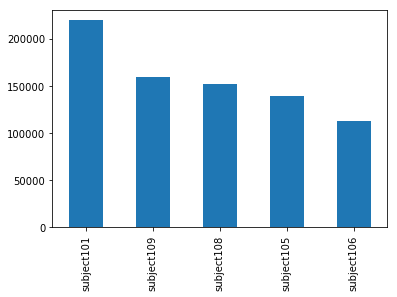

In [20]:
subjects_o = optional_df['subject'].value_counts()
subjects_o.plot(kind="bar")

## Merging Datasets

In [21]:
dfs = [optional_df, protocol_df]
df = pd.concat(dfs,ignore_index=True)
df.shape

(2724953, 55)

In [22]:
subject_activities = pd.crosstab(df.subject,df.activityID )

In [23]:
pd.crosstab(df.subject,df.activityID, margins=True)

activityID,1,2,3,4,5,6,7,9,10,11,12,13,16,17,18,19,20,24,All
subject,,,,,,,,,,,,,,,,,,,
subject101,27187,23480,21717,22253,21265,23575,20265,83646,0,54519,15890,14899,22941,23573,27114,54089,0,12912,469325
subject102,23430,22345,25576,32533,9238,25108,29739,0,0,0,17342,15213,20683,28880,0,0,0,13262,263349
subject103,22044,28761,20533,29036,0,0,0,0,0,0,10389,15275,20325,27975,0,0,0,0,174338
subject104,23047,25492,24706,31932,1,22699,27533,0,0,0,16694,14285,20037,24995,0,0,0,0,231421
subject105,23699,26864,22132,32033,24646,24577,26271,0,110883,0,14281,12727,24445,33034,0,28488,0,7733,411813
subject106,23340,23041,24356,25721,22825,20486,26686,0,61777,0,13291,11272,21078,37744,21786,28714,0,256,362373
subject107,25611,12282,25751,33720,3692,22680,28725,0,0,0,17646,11618,21552,29499,0,0,0,0,232776
subject108,24165,22923,25160,31533,16532,25475,28888,0,68725,0,11683,9655,24292,32990,23650,41691,18126,8806,414294
subject109,0,0,0,0,0,0,0,0,68550,0,0,0,0,0,27328,34206,28789,6391,165264


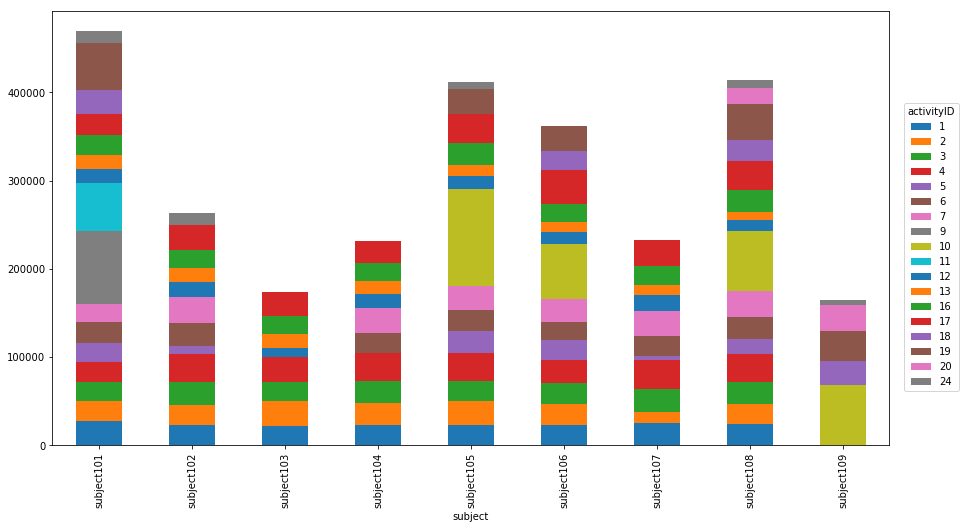

In [24]:
ax = subject_activities.plot.bar(stacked=True, figsize=(15,8))
ax.legend(loc='upper center', bbox_to_anchor=(1.05, 0.8), title="activityID")
plt.show()

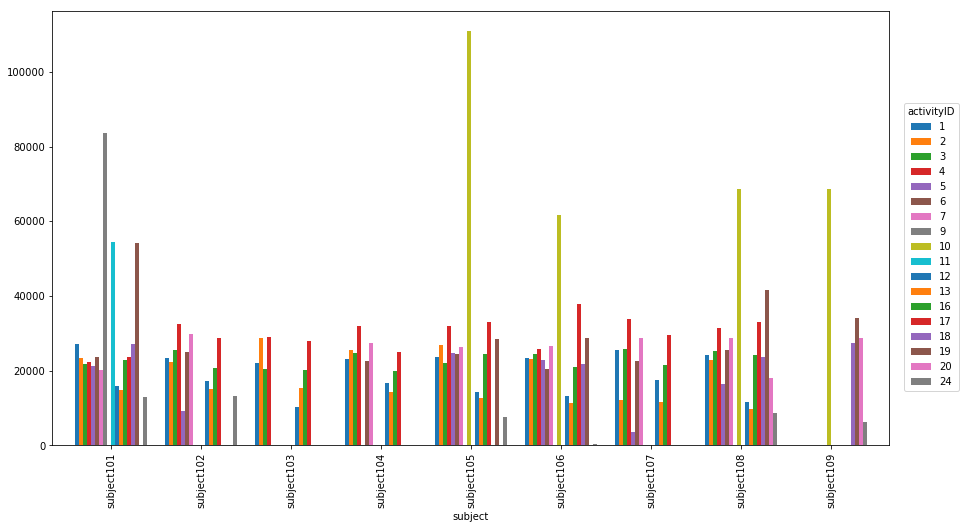

In [25]:
ax = subject_activities.plot.bar(figsize=(15,8), width = 0.8)
ax.legend(loc='upper center', bbox_to_anchor=(1.05, 0.8), title="activityID")
plt.show()

### Identifying Missing Values

We can use info() to get the number of entries of each column.

In [26]:
df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2724953 entries, 0 to 2724952
Data columns (total 55 columns):
timestamp     2724953 non-null float64
activityID    2724953 non-null int64
heartrate     248827 non-null float64
hand_1        2713085 non-null float64
hand_2        2713085 non-null float64
hand_3        2713085 non-null float64
hand_4        2713085 non-null float64
hand_5        2713085 non-null float64
hand_6        2713085 non-null float64
hand_7        2713085 non-null float64
hand_8        2713085 non-null float64
hand_9        2713085 non-null float64
hand_10       2713085 non-null float64
hand_11       2713085 non-null float64
hand_12       2713085 non-null float64
hand_13       2713085 non-null float64
hand_14       2713085 non-null float64
hand_15       2713085 non-null float64
hand_16       2713085 non-null float64
hand_17       2713085 non-null float64
chest_1       2721895 non-null float64
chest_2       2721895 non-null float64
chest_3       2721895 non-null f

We can see that a lot of columns have values missing. We can identify null or NaN values by isnull(). 

Following line of code tells us total of NaN values for each column. 

In [27]:
df.isnull().sum()

timestamp           0
activityID          0
heartrate     2476126
hand_1          11868
hand_2          11868
hand_3          11868
hand_4          11868
hand_5          11868
hand_6          11868
hand_7          11868
hand_8          11868
hand_9          11868
hand_10         11868
hand_11         11868
hand_12         11868
hand_13         11868
hand_14         11868
hand_15         11868
hand_16         11868
hand_17         11868
chest_1          3058
chest_2          3058
chest_3          3058
chest_4          3058
chest_5          3058
chest_6          3058
chest_7          3058
chest_8          3058
chest_9          3058
chest_10         3058
chest_11         3058
chest_12         3058
chest_13         3058
chest_14         3058
chest_15         3058
chest_16         3058
chest_17         3058
ankle_1          9867
ankle_2          9867
ankle_3          9867
ankle_4          9867
ankle_5          9867
ankle_6          9867
ankle_7          9867
ankle_8          9867
ankle_9   

#### Handling Missing Values

Depending on how we decide to handle missing values in the dataset, following are some methods. But, one should be careful about how we handle missing value; replacing with 0 or dropping the row will change the mean or median/frequency or any of the feature ratings. 

In [28]:
#df = df.fillna(0) # replaces NaN values with 0 or some other specified value
#df.dropna(how='any') #drop row if any of the column values is missing. 
#df.dropna(how='all') #drop the row if all column values are missing

# drop row if any/all column specified are missing
#df.dropna(subset=['',''], how='any').shape

### Identifying Outliers

We can visualize using boxplot to check for the ouliers. We will first split the df into Dataframe dictionary based on the subjects. 

Readings for different subjects could be different, so we will check for outliers for each subject separately. 

In [29]:
subjectDict = {elem : pd.DataFrame for elem in df.subject.unique()}
for key in subjectDict.keys():
    subjectDict[key] = df.loc[:, :'ankle_17'][df.subject == key]

There are different ways to identify and remove outliers. IQR is said to be one of the most used and robust ways to detect outliers. So thats what we are using. IQR uses percentiles. Usually 25 and 75th percentile is used. But through trial we have seen that it will cut off a lot of data, hence, we are using 5th and 95th percentile. 

In [30]:
def iqr_outliers(df):
    Q1 = df.quantile(0.05)
    Q3 = df.quantile(0.95)
    IQR = Q3 - Q1
    cut_off = IQR * 1.5
    lower, upper = Q1 - cut_off, Q3 + cut_off
    return(df[((df < lower) |(df > upper)).any(axis=1)])

def remove_iqr_outliers(df):
    Q1 = df.quantile(0.05)
    Q3 = df.quantile(0.95)
    IQR = Q3 - Q1    
    return(df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)])

In [31]:
subject101 = subjectDict['subject101']
print('Identified outliers for subject 101: %d' % len(iqr_outliers(subject101)))

Identified outliers for subject 101: 17454


In [32]:
subject101_out = remove_iqr_outliers(subject101)
subject101_out.shape

(451871, 54)

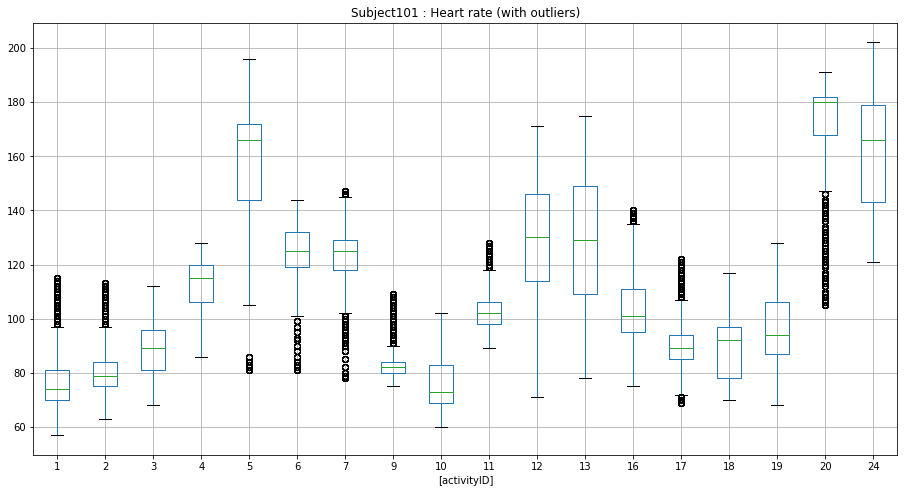

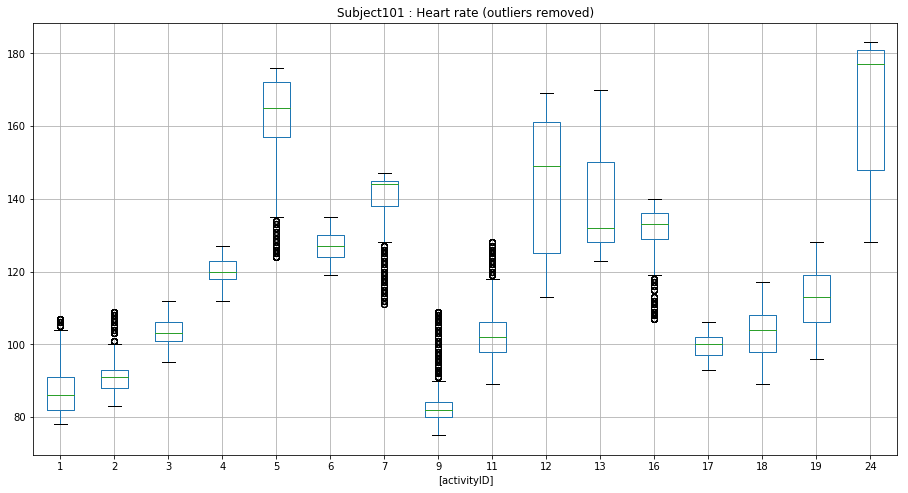

In [33]:
## Visualizing outliers for heart rate 


plt.figure(1)
df.boxplot(column = ['heartrate'], figsize=(15,8), by = ['activityID']);
plt.title("Subject101 : Heart rate (with outliers)")
plt.suptitle('')
#plt.show()

plt.figure(2)
subject101_out.boxplot(column = ['heartrate'], figsize=(15,8), by = ['activityID']);
plt.title("Subject101 : Heart rate (outliers removed)")
plt.suptitle('')

plt.show()

We can see from both the plots that there is some difference between the outliers. Further we can also change the range or method for outlier detection.

But in most cases we have to consider if to remove outlier or not, because the supposed outlier value could denote some significant meaning in the dataset. 

Similar to mple we can visualize any of the features of any subject, and, if so we choose, remove the outliers.